<a id='top'></a>
<img align="center" src="http://www.ac.gov.ru/cache/thumbs/780/780_0_c8df0891a2569fd2ce041ef07a982411.jpg" width="200" />
<p style="text-align: center;">
    <font size='5' type='bold'>
        <b>Определение количества заказов такси</b>
    </font>
</p>

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Привет еще раз,  Алексей! Сейчас будет опять формальный комментарий.
    
Не буду дублировать некоторые вещи, о которых в предыдущей работе тебе писал
</div>


<div class="alert alert-info">
Привет! Меня зовут Никита Мишин и я буду твоим ревьюером по этому проекты.
Для простоты предлагаю общение на 'ты'. Буду предполагать, что ты не против:) 
Если более предпочтительно обращение на 'Вы', пиши, не стесняйся.
Также если будут возникать вопросы, аналогично, пиши:)

Предлагаю работать в известном тебе итеративном формате.
Итерация состоит в моей проверке твоего решения. 
После решения могут остаться какие-то недочеты, которые я попрошу тебя устранить, ты их исправляешь и я проверяю твои решения.
    Оставленные мною комментарии могут быть разного вида:
   
    - зеленый: элегантные решения, которые тебе стоит запомнит и в дальнейшем взять на вооружение:) 
    
    - желтый: сигнал о том, что есть некритичная вещь(не всегда ошибка), что нужно точно поправить в следующей работе, даже желательно в этой (полезно, в первую очередь, для тебя:) ).Также это рекомендации на будущее    

    - красный: недочет, который нужно исправить в этой работе, для того, чтобы она была принята
    
    - синий: полезная информация, доп ресурсы, "вопросы на подумать"

Также попрошу не удалять мои комментарии:) <a class="tocSkip">
</div>

# Содержание

<a href='#section_0'>Описание проекта</a>

<a href='#section_1'>1. Подготовка</a>

<a href='#section_2'>2. Анализ</a>

<a href='#section_3'>3. Обучение</a>

* <a href='#section_3_1'>Linear Regression</a>
* <a href='#section_3_2'>LightGBM</a>

<a href='#section_4'>4. Тестирование</a>

<a href='#section_5'>Общий вывод</a>

<a href='#section_end'>Чек-лист готовности проекта</a>

<a id='section_0'></a>
# Описание проекта

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

**Инструкция по выполнению проекта**

1. Загрузите данные и выполните их ресемплирование по одному часу.
2. Проанализируйте данные.
3. Обучите разные модели с различными гиперпараметрами. Сделайте тестовую выборку размером 10% от исходных данных.
4. Проверьте данные на тестовой выборке и сделайте выводы.

**Описание данных**

Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце '*num_orders*' (от англ. *number of orders*, «число заказов»).

<a id='section_1'></a>
## Подготовка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Посмотрим на данные и определим временной ряд

df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
df.head(3)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
num_orders    26496 non-null int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
#Проверим наличие пропусков

df.isna().sum()

num_orders    0
dtype: int64

In [5]:
# Проверим временной ряд на монотонность

print(df.index.is_monotonic)

True


<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Данные успешно загружены и проверены, движемся дальше!
</div>

Данные подготовлены для дальнейшей работы.

<a href='#top'>Back to top</a>

<a id='section_2'></a>
## Анализ

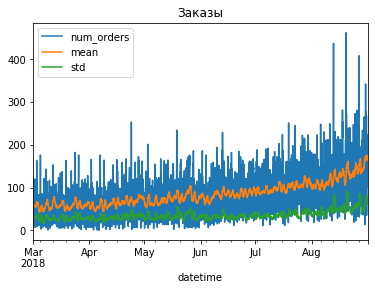

In [6]:
# Проведем ресемплирование по часу

df.sort_index(inplace=True)
df_hour = df.resample('1H').sum()

# Построим общий график и посмотрим на скользящее среднее и скользящее стандартное отклонение

df_hour['mean'] = df_hour['num_orders'].rolling(25).mean()
df_hour['std'] = df_hour['num_orders'].rolling(25).std()
df_hour.plot(title='Заказы')

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Тут у графика не хватает названия. Поставил синим, т.к ниже у тебя есть подписи, видимо, забыл
</div>

<div class="alert alert-info">
<h1>Комментарий студента <a class="tocSkip"></a></h1>
Done
</div>

In [ ]:
# Посмотрим на тренды и сезонность

df_hour['mean'] = df_hour['num_orders'].rolling(10).mean()
df_hour['std'] = df_hour['num_orders'].rolling(10).std()
df_hour = df_hour.dropna()

decomposed_df = seasonal_decompose(df_hour)
decomposed_df.trend.plot(title='Тренды', figsize=(15,4))
decomposed_df.trend['2018-08-26':'2018-09-01'].plot(title='Тренды', figsize=(15,4))
decomposed_df.seasonal.tail(24*7).plot(title='Сезонность', figsize=(15,4))
plt.figure(figsize=(15, 4))

<Figure size 1080x288 with 0 Axes>

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
А чем обоснован выбор  значения 10?)
</div>

<div class="alert alert-info">
<h1>Комментарий студента<a class="tocSkip"></a></h1>
Хотел сразу добиться лучшего сглаживания скользящего среднего, но и с меньшим размером окна картина не сильно отличается. Разброс данных не велик. 
</div>

**Вывод:**

* Количество заказов регулярно растет
* Количество заказов в выходные дни выше, чем в будни. То же касается и праздников (как например, 1 сентября)
* Количество заказов утром и в первой половине дня меньше, чем во второй половине дня и ближе к ночи

<div class="alert alert-warning">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Увидев такой график, стоило рассмотреть на более мелком временном интервале график. Например, за 1 день. Тогда было бы явно видно, в какое время пик, а когда наблюдается минимальное значение
</div>

<div class="alert alert-info">
<h1>Комментарий студента<a class="tocSkip"></a></h1>
Done. 
</div>

<a href='#top'>Back to top</a>

<a id='section_3'></a>
## Обучение

In [ ]:
# Создадим дополнительные признаки

def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

make_features(df, 9, 9)

df.describe()

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Матрица корреляций', fontsize=16);

<div class="alert alert-warning">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Тут стоило бы вывести матрицу корреляций для проверки на коллинеарности признаков
</div>

<div class="alert alert-info">
<h1>Комментарий студента<a class="tocSkip"></a></h1>
Done.
</div>

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Да, молодец, верное решение:) Отдельный плюс в карму за то, что оформил в виде функции
</div>

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Опять же вопрос, почему 9? Надо бы пояснить, иначе магические константы
</div>

<div class="alert alert-info">
<h1>Комментарий студента<a class="tocSkip"></a></h1>
Согласен. Многовато =) Для того, чтобы увидет растет функция или уменьшается достаточно 3-4 отстающих значений в качестве признаков.
</div>

In [ ]:
# Подготовим данные к обучению

train, test = train_test_split(df, shuffle=False, test_size=0.1)
train = train.dropna()
test = test.dropna()

X_train = train.drop(['num_orders'], axis=1)
y_train = train['num_orders']
X_test = test.drop(['num_orders'],axis=1)
y_test = test['num_orders']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<div class="alert alert-danger">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Так, так, опять валидационную забыл?

Можешь не править, если объяснишь, почему здесь лучше использовать train-test, а не train-validation-test
</div>

<div class="alert alert-info">
<h1>Комментарий студента<a class="tocSkip"></a></h1>
Так как это временной ряд, нам важен постоянный порядок наблюдений. Данные мы не можем перемешивать (указываем праметр shuffle=False), чтобы сохранить "ход истории". В связи с эти нет необходимости в валидационной выборке и предсказания уже можно проверять на тестовой.
</div>

<div class="alert alert-success">
<h1>Комментарий ревьюера v2 <a class="tocSkip"></a></h1>
Ок, убедил
</div>

<div class="alert alert-success">
<h1>Комментарий ревьюера v2<a class="tocSkip"></a></h1>
Спасибо, что поправил мелкие замечания. Поздравляю с очередным успешным проектом!
</div>

<a id='section_3_1'></a>
### Linear Regression

In [ ]:
model_linear = LinearRegression(n_jobs=-1)
model_linear.fit(X_train, y_train)
pred_linear = model_linear.predict(X_test)
linearregression_rmse = np.sqrt(((pred_linear - y_test) ** 2).mean())
print('RMSE:', linearregression_rmse)

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Я бы посоветовал бы посмотреть coeffs, чтобы понять, что так сильно влияет и позволило делать такие хорошие предсказания
</div>

<a href='#top'>Back to top</a>

<a id='section_3_2'></a>
### LightGBM

In [ ]:
model_lgb = lgb.LGBMRegressor()
model_lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='rmse')
pred_lgb = model_lgb.predict(X_test)
lightgbm_rmse = np.sqrt(((pred_lgb - y_test) ** 2).mean())
print('RMSE:', lightgbm_rmse)

**Вывод:**
* Обе модели Linear Regression и LightGBM показали сопоставимые результаты, однако модель линейной регрессии показала лучшее качество по RMSE (8.55 против 8.88 у модели градиентного бустинга)

<a href='#top'>Back to top</a>

<a id='section_4'></a>
## Тестирование

In [ ]:
# Сравним истинное количество заказов в день с предсказаниями модели

predictions = pd.DataFrame(data=pred_linear, columns=['predictions'], index=X_test.index.copy())
df_merged = pd.merge(y_test, predictions, how = 'left', left_index = True, right_index = True)
df_merged['predictions'] = df_merged['predictions'].astype('int64')
df_merged['2018-08-20':'2018-08-22'].plot(figsize=(15,4))

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Да, резултаты получились хорошие:)
    
Думал в сторону data leakage, но пока ничего плохого не нашел:)

Когда поправишь красное замечание, детально еще раз проверю на корректность все.

Пока все гут, в остальном:)
</div>

Наглядно показано, как модель соотносится с истинными значениями с минимальной погрешностью

<a href='#top'>Back to top</a>

<a id='section_4'></a>
# Общий вывод

* Такси пользуются все чаще и предпочитают это делать во второй половине дня и ближе к ночи. При этом заказы примерно равномерно распределены по дням недели
* Для построения модели из двух алгоритмов - Linear Regression и LightGBM, показавших сопоставимые результаты, лучшим качеством по RMSE обладает линейная регрессия (8.55 против 8.88 у модели градиентного бустинга)
* Качество предсказаний на этапе тестирования подтверждает эффективность выбранной модели линейной регрессии для данного набора данных

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

-Спасибо за качественно сделанный проект, было приятно проверять.

- Код написан хорошо 

- Соблюдена структура проекта


Есть пара недочетов, которые надо поправить. Жду твоих исправлений (совсем чуть-чуть поправить надо):
    - красный комментарий

Если есть какие-то вопросы, обязательно спрашивай, с радостью отвечу!
    
- Также оставил пару советов и замечаний

</div>

<a href='#top'>Back to top</a>

<a id='section_end'></a>
# Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48